<font size="+5">#10. Principal Component Analysis (PCA)</font>

- Book + Private Lessons [Here ↗](https://sotastica.com/reservar)
- Subscribe to my [Blog ↗](https://blog.pythonassembly.com/)
- Let's keep in touch on [LinkedIn ↗](www.linkedin.com/in/jsulopz) 😄

# Load the Data

> - Simply execute the following lines of code to load the data
> - This dataset contains **statistics** (columns)
> - About **Car Models** (rows)

https://blog.pythonassembly.com/python-tutorial-or-principal-component-analysis-made-simple

In [57]:
import seaborn as sns

df = sns.load_dataset(name='mpg', index_col='name')
df.sample(10)

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin
name,,,,,,,,
ford country,12.0,8,400.0,167.0,4906,12.5,73,usa
ford ranger,28.0,4,120.0,79.0,2625,18.6,82,usa
toyota corolla 1600 (sw),27.0,4,97.0,88.0,2100,16.5,72,japan
vw rabbit c (diesel),44.3,4,90.0,48.0,2085,21.7,80,europe
fiat 124 tc,26.0,4,116.0,75.0,2246,14.0,74,europe
mercury capri v6,21.0,6,155.0,107.0,2472,14.0,73,usa
audi 100ls,20.0,4,114.0,91.0,2582,14.0,73,europe
amc concord,24.3,4,151.0,90.0,3003,20.1,80,usa
buick estate wagon (sw),16.9,8,350.0,155.0,4360,14.9,79,usa


# Data Preprocessing

- All variables need to be **comparables**.
- It is not the same to increase 1kg of weight, than 1m of height.
- We will use `StandardScaler()`.

In [58]:
df.isna().sum()

mpg             0
cylinders       0
displacement    0
horsepower      6
weight          0
acceleration    0
model_year      0
origin          0
dtype: int64

In [59]:
df.dropna(inplace=True)

In [60]:
df.drop(columns='origin', inplace=True)

In [61]:
df

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year
name,,,,,,,
chevrolet chevelle malibu,18.0,8,307.0,130.0,3504,12.0,70
buick skylark 320,15.0,8,350.0,165.0,3693,11.5,70
plymouth satellite,18.0,8,318.0,150.0,3436,11.0,70
amc rebel sst,16.0,8,304.0,150.0,3433,12.0,70
ford torino,17.0,8,302.0,140.0,3449,10.5,70
...,...,...,...,...,...,...,...
ford mustang gl,27.0,4,140.0,86.0,2790,15.6,82
vw pickup,44.0,4,97.0,52.0,2130,24.6,82
dodge rampage,32.0,4,135.0,84.0,2295,11.6,82


In [67]:
import pandas as pd
from sklearn.preprocessing import StandardScaler

In [68]:
scaler = StandardScaler()

In [79]:
dfnorm = pd.DataFrame(data=scaler.fit_transform(df), columns=df.columns, index=df.index)

In [80]:
dfnorm

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year
name,,,,,,,
chevrolet chevelle malibu,-0.698638,1.483947,1.077290,0.664133,0.620540,-1.285258,-1.625315
buick skylark 320,-1.083498,1.483947,1.488732,1.574594,0.843334,-1.466724,-1.625315
plymouth satellite,-0.698638,1.483947,1.182542,1.184397,0.540382,-1.648189,-1.625315
amc rebel sst,-0.955212,1.483947,1.048584,1.184397,0.536845,-1.285258,-1.625315
ford torino,-0.826925,1.483947,1.029447,0.924265,0.555706,-1.829655,-1.625315
...,...,...,...,...,...,...,...
ford mustang gl,0.455941,-0.864014,-0.520637,-0.480448,-0.221125,0.021294,1.636410
vw pickup,2.636813,-0.864014,-0.932079,-1.364896,-0.999134,3.287676,1.636410
dodge rampage,1.097374,-0.864014,-0.568479,-0.532474,-0.804632,-1.430430,1.636410


# `KMeans()` Model in Python

## Code Thinking

> Which function computes the Model?
> - `fit()`
>
> How could can you **import the function in Python**?

In [82]:
from sklearn.cluster import KMeans

In [83]:
model = KMeans(n_clusters=3)

## Get the `cluster` for all USA States

> - `model.` + `↹`

In [84]:
model.fit(dfnorm)

KMeans(n_clusters=3)

> - Create a `dfsel` DataFrame
> - That contains the **columns you used for the model**

In [85]:
dfsel = df.copy()
dfsel

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year
name,,,,,,,
chevrolet chevelle malibu,18.0,8,307.0,130.0,3504,12.0,70
buick skylark 320,15.0,8,350.0,165.0,3693,11.5,70
plymouth satellite,18.0,8,318.0,150.0,3436,11.0,70
amc rebel sst,16.0,8,304.0,150.0,3433,12.0,70
ford torino,17.0,8,302.0,140.0,3449,10.5,70
...,...,...,...,...,...,...,...
ford mustang gl,27.0,4,140.0,86.0,2790,15.6,82
vw pickup,44.0,4,97.0,52.0,2130,24.6,82
dodge rampage,32.0,4,135.0,84.0,2295,11.6,82


> - Add a **new column**
> - That **contains the `cluster` prediction** for every USA State

In [86]:
pred = model.predict(dfnorm)

In [87]:
dfsel['cluster'] = pred
dfsel

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,cluster
name,,,,,,,,
chevrolet chevelle malibu,18.0,8,307.0,130.0,3504,12.0,70,0
buick skylark 320,15.0,8,350.0,165.0,3693,11.5,70,0
plymouth satellite,18.0,8,318.0,150.0,3436,11.0,70,0
amc rebel sst,16.0,8,304.0,150.0,3433,12.0,70,0
ford torino,17.0,8,302.0,140.0,3449,10.5,70,0
...,...,...,...,...,...,...,...,...
ford mustang gl,27.0,4,140.0,86.0,2790,15.6,82,1
vw pickup,44.0,4,97.0,52.0,2130,24.6,82,1
dodge rampage,32.0,4,135.0,84.0,2295,11.6,82,1


## Model Visualization

> - You may `hue=` the points with the `cluster` column

``
Se representan 2 variables cualquiera aquí?
``

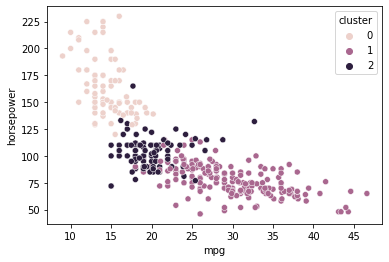

In [88]:
sns.scatterplot(x="mpg", y="horsepower", hue="cluster", data=dfsel);

## Model Interpretation

> - Does the visualization makes sense?
> - The points are mixed between the groups, why?
> - We are **just representing 2 variables**
> - And the model was **fitted with 7 variables**

# Grouping Variables with `PCA()`

In [92]:
%%HTML

<iframe width="560" height="315" src="https://www.youtube.com/embed/HMOI_lkzW08" title="YouTube video player" frameborder="0" allow="accelerometer; autoplay; clipboard-write; encrypted-media; gyroscope; picture-in-picture" allowfullscreen></iframe>

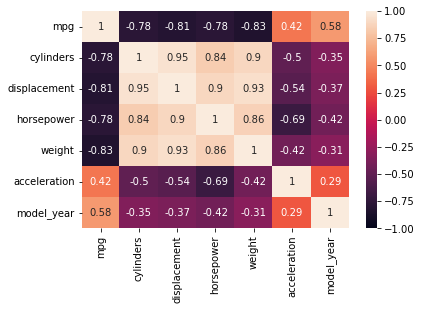

In [94]:
sns.heatmap(dfnorm.corr(), annot=True, vmin=-1);

## Transform Data to Components

> - `PCA()` is another technique used to transform data.
> How has the data been manipulated so far?
> 1. Original Data `df`
> 2. Normalized Data `dfnorm`
> 3. Principal Components Data `dfpca` (now)

In [95]:
from sklearn.decomposition import PCA

In [96]:
pca = PCA()

In [98]:
dfpca = pd.DataFrame(pca.fit_transform(dfnorm), index=df.index)

In [102]:
pca_columns = ['PC' + str(i+1) for i in range(pca.n_components_)]
dfpca.columns = pca_columns

In [104]:
dfpca

,PC1,PC2,PC3,PC4,PC5,PC6,PC7
name,,,,,,,
chevrolet chevelle malibu,2.635049,0.929039,-0.534679,0.745590,-0.546008,-0.094974,-0.122078
buick skylark 320,3.493800,0.805473,-0.649495,0.494829,-0.035636,0.207134,0.097861
plymouth satellite,2.970415,0.881186,-0.958742,0.719725,-0.286908,0.136587,-0.059750
amc rebel sst,2.910197,0.961721,-0.582953,0.531489,-0.283952,0.293239,-0.124521
ford torino,2.903826,0.952789,-1.054836,0.565102,-0.544802,-0.001897,-0.170826
...,...,...,...,...,...,...,...
ford mustang gl,-1.440898,-1.226641,-0.311195,-0.673363,0.069950,-0.191146,0.104669
vw pickup,-4.112474,-1.330384,1.939727,1.358522,0.754758,0.220691,0.084173
dodge rampage,-1.566816,-1.225221,-1.930098,-0.316704,-0.235479,-0.264503,0.147568


## Visualize Components & Clusters

> - A **scatterplot** with `PC1` & `PC2`
> - Colour points by `cluster`
> - Are they **mixed** now?

In [105]:
sns.scatterplot(x='PC1', y='PC2', hue='cluster', data=dfpca)

ValueError: Could not interpret value `cluster` for parameter `hue`

## Relationship between Original Variables & Components

### Loading Vectors

### Calculating One PCA Value

### Biplot

# Achieved Goals

_Double click on **this cell** and place an `X` inside the square brackets (i.e., [X]) if you think you understand the goal:_

- [ ] Understand the role of **Linear Algebra** on Machine Learning
    - Matrix Multiplications with the `loadings`
- [ ] Necessity to `StandardScaler()` the data when the algorithm implies distance calculations
- [ ] Understand that every Machine Learning process is a matter of optimization
    - To find the best numbers based on a criteria
    - How is done in `PCA()`?
- [ ] Why would you use PCA?
    - Visualization
    - Preprocess the data for modelling
- [ ] There are techniques for everything
    - [ ] Grouping observations
    - [ ] Grouping variables